<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" width=160px align="left" />

### <span style="color:red ">以下是我們需要的量化分析套件:
---    
    1. Jupyter Notebook環境中，第一次安裝過就好，以後直接導入模組就好。
    2. 如果你是在Colab的環境中運作檔案，請每次安裝

! pip install ffn

! pip install --upgrade pandas_datareader

## <議題1> ffn簡單起手式

### <span style="color:red ">1.程式運作開始
-----
```
    因為我們希望可以直接看到系統計算出來的分析圖，所以導入模組務必有
    
          %matplotlib inline
    
    這句話。
```

In [9]:
import ffn
%matplotlib inline

### <span style="color:red ">2. 分析變數設定

In [10]:
# 接下來我們需要設定三個主要的變數
# 「分析股票標的」是我們希望看到的股票標的。
# 設定方法  分析股票標的='AAPL,MSFT,GOOGL,AMZN,TSLA' 

# 「分析開始日期」是我們想要看到股價的開始日期
# 設定方法 分析開始日期='2018-01-01'

# 「分析結束日期」 是我們蒐集股價的結束日期
# 設定方法 分析結束日期='2020-09-01'

分析股票標的=['AAPL','MSFT','GOOGL','AMZN','TSLA']
分析開始日期='2022-04-6'
分析結束日期='2023-04-6'

### <span style="color:red ">3. 變數設定完成後，啟動機器，去把股價抓回來

In [11]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

data = pdr.get_data_yahoo(分析股票標的, start=分析開始日期, end=分析結束日期)
prices=data['Close']
prices

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2022-04-06,171.830002,158.755997,136.548004,299.500000,348.586670
2022-04-07,172.139999,157.784500,135.888504,301.369995,352.420013
2022-04-08,170.089996,154.460495,133.287506,296.970001,341.829987
2022-04-11,165.750000,151.121994,128.823502,285.260010,325.309998
2022-04-12,167.660004,150.787506,127.714500,282.059998,328.983337
...,...,...,...,...,...
2023-03-30,162.360001,102.000000,100.889999,284.049988,195.279999
2023-03-31,164.899994,103.290001,103.730003,288.299988,207.460007
2023-04-03,166.169998,102.410004,104.360001,287.230011,194.770004


### <span style="color:red ">4. 文字總是傷我神，還是圖畫合我心

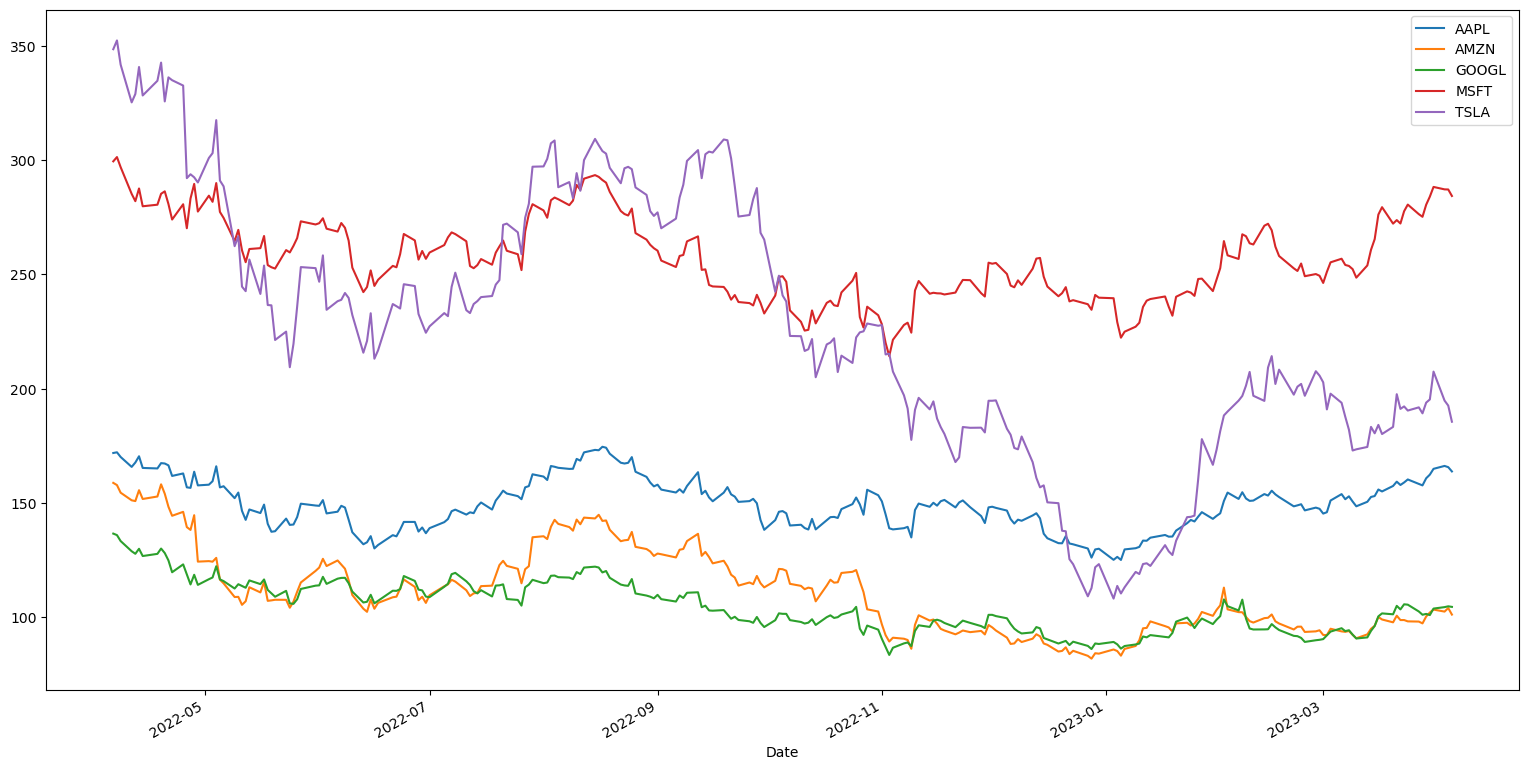

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [19, 10]
prices.plot()

### <span style="color:red "><插句話> 上面股價四家的股價又不一樣，我怎麼知道哪一家漲幅最大==>那我們就rebase，把大家調成一樣吧!!
-----
    透過rebase，大家的起始價格都會變成100塊。

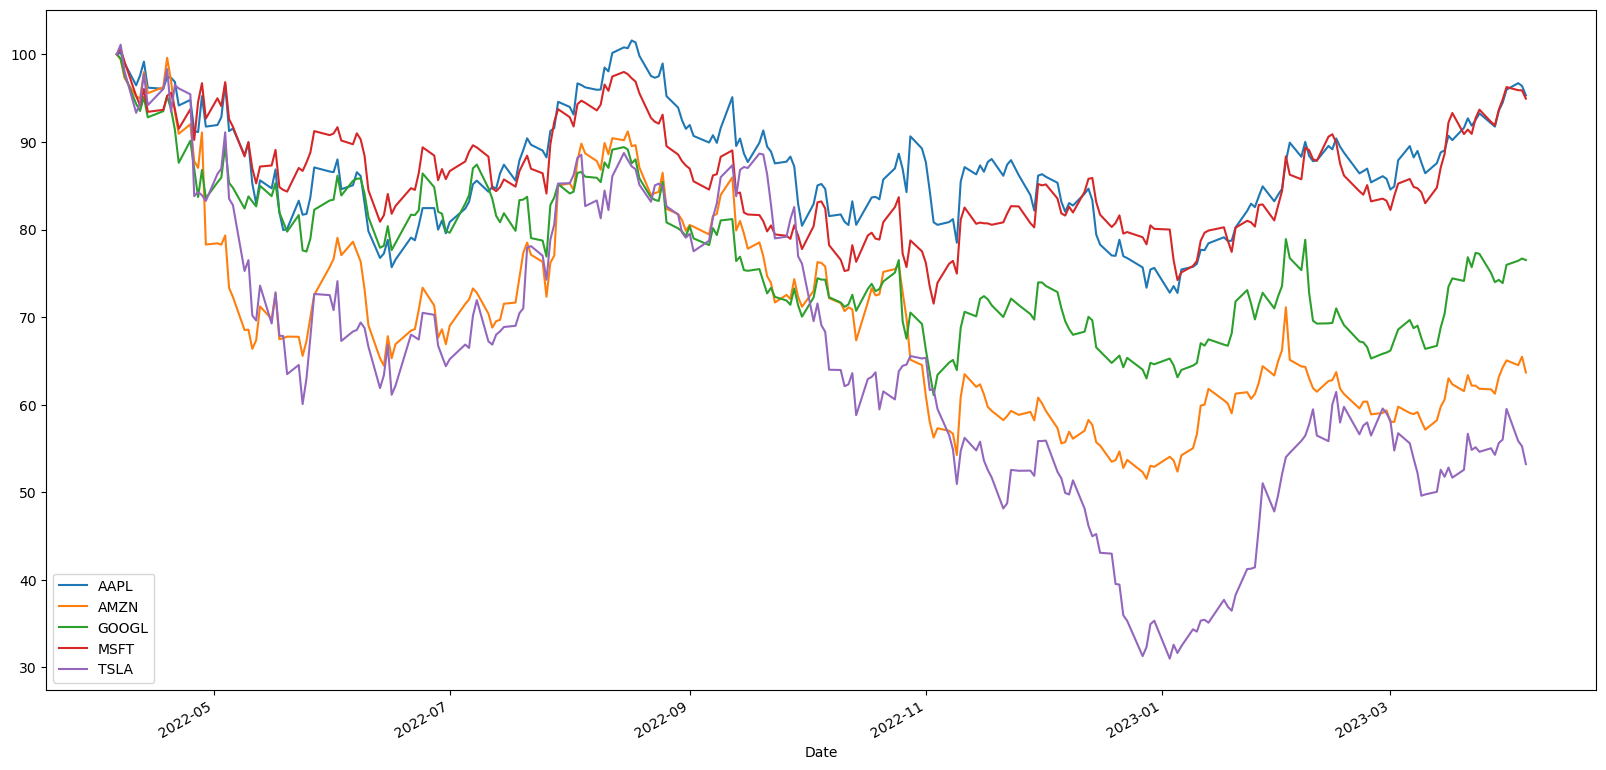

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
prices.rebase().plot()

## <議題2> 還記的我們最關心的收益率嗎?  ffn幫你算

### <span style="color:red "> 算一下簡單收益率

In [14]:
simple_returns = prices.to_returns().dropna()
simple_returns = simple_returns.reset_index(level=0)
simple_returns['Date'] = simple_returns['Date'].dt.tz_localize(None)
simple_returns.to_excel("simple_returns.xlsx") 
simple_returns

,Date,AAPL,AMZN,GOOGL,MSFT,TSLA
0,2022-04-07,0.001804,-0.006119,-0.004830,0.006244,0.010997
1,2022-04-08,-0.011909,-0.021067,-0.019141,-0.014600,-0.030049
2,2022-04-11,-0.025516,-0.021614,-0.033492,-0.039432,-0.048328
3,2022-04-12,0.011523,-0.002213,-0.008609,-0.011218,0.011292
4,2022-04-13,0.016343,0.031524,0.017065,0.019712,0.035888
...,...,...,...,...,...,...
245,2023-03-30,0.009890,0.017456,-0.004931,0.012620,0.007221
246,2023-03-31,0.015644,0.012647,0.028150,0.014962,0.062372
247,2023-04-03,0.007702,-0.008520,0.006073,-0.003711,-0.061168
248,2023-04-04,-0.003250,0.015038,0.003450,-0.000174,-0.011244


### <span style="color:red "> 簡單收益率-還是畫圖看一下好了

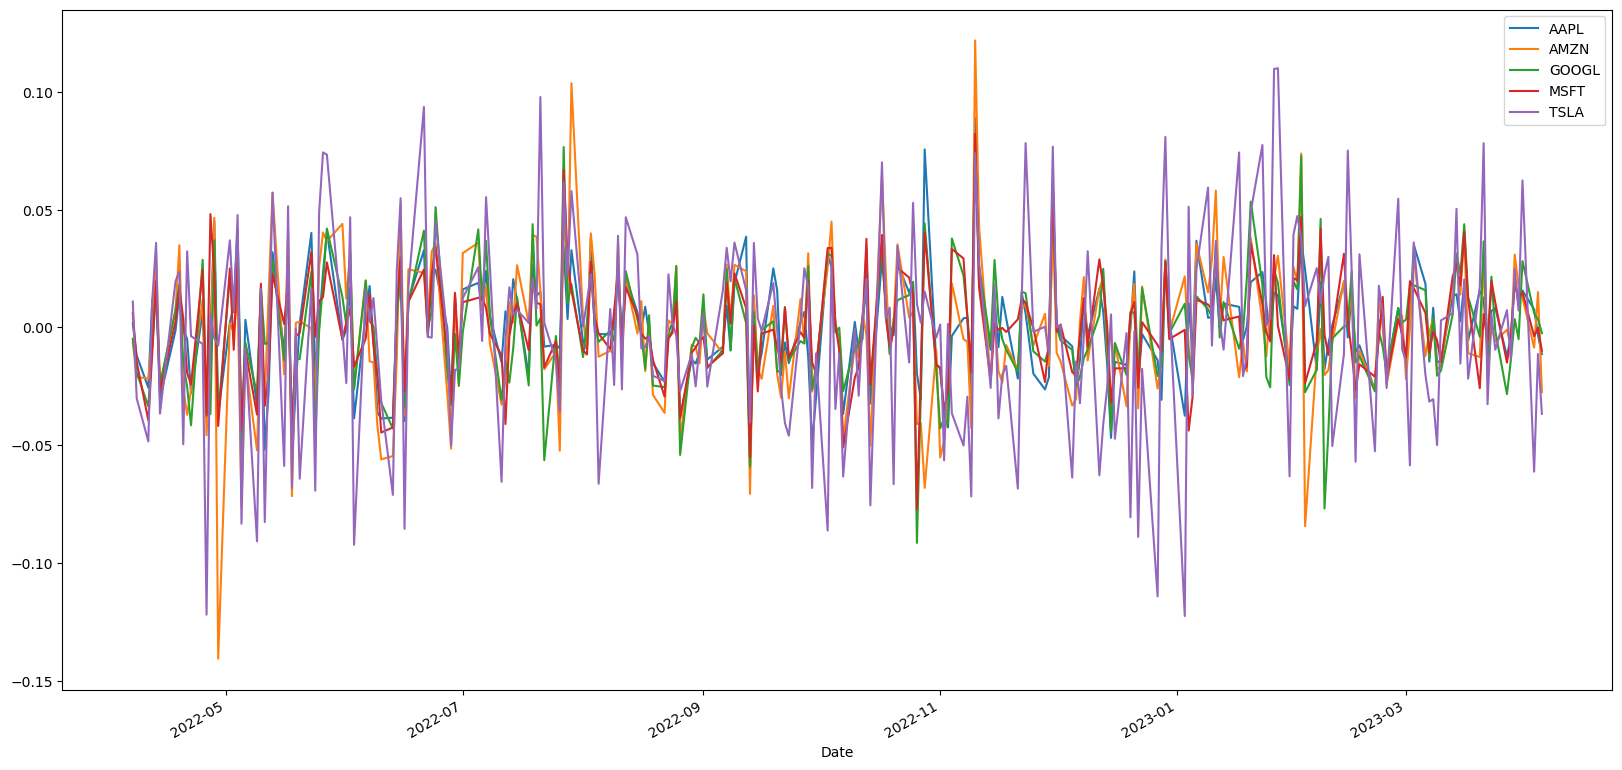

In [15]:
simple_returns = prices.to_returns().dropna()
simple_returns.plot.line(figsize=(20, 10))

### <span style="color:red "> 算一下對數收益率

In [16]:
log_returns = prices.to_log_returns().dropna()
log_returns = log_returns.reset_index(level=0)
log_returns['Date'] = log_returns['Date'].dt.tz_localize(None)
log_returns.to_excel("log_returns.xlsx")
log_returns

,Date,AAPL,AMZN,GOOGL,MSFT,TSLA
0,2022-04-07,0.001802,-0.006138,-0.004842,0.006224,0.010937
1,2022-04-08,-0.011980,-0.021292,-0.019326,-0.014708,-0.030510
2,2022-04-11,-0.025847,-0.021851,-0.034065,-0.040230,-0.049535
3,2022-04-12,0.011458,-0.002216,-0.008646,-0.011281,0.011229
4,2022-04-13,0.016210,0.031038,0.016921,0.019520,0.035259
...,...,...,...,...,...,...
245,2023-03-30,0.009841,0.017306,-0.004944,0.012541,0.007195
246,2023-03-31,0.015523,0.012568,0.027761,0.014851,0.060504
247,2023-04-03,0.007672,-0.008556,0.006055,-0.003718,-0.063119
248,2023-04-04,-0.003255,0.014926,0.003444,-0.000174,-0.011308


### <span style="color:red "> 對數收益率-還是畫圖看一下好了

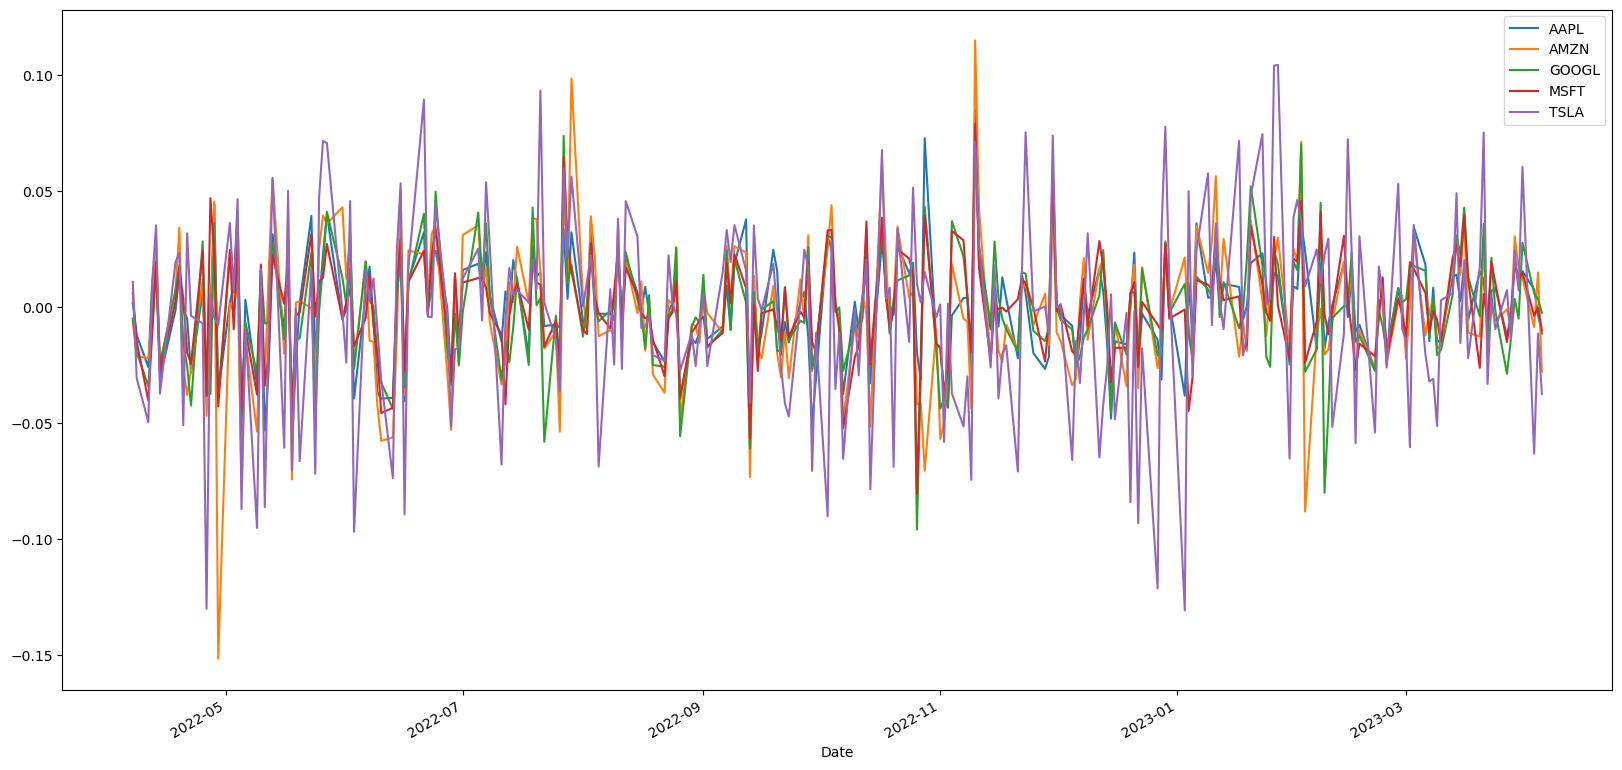

In [17]:
log_returns = prices.to_log_returns().dropna()
log_returns.plot.line(figsize=(20, 10))

## 基本上我們就很好奇，到底哪些股票的收益率是有相關性的

In [18]:
log_returns.corr().as_format('.2f')

,AAPL,AMZN,GOOGL,MSFT,TSLA
AAPL,1.00,0.70,0.77,0.79,0.61
AMZN,0.70,1.00,0.75,0.75,0.54
GOOGL,0.77,0.75,1.00,0.82,0.49
MSFT,0.79,0.75,0.82,1.00,0.49
TSLA,0.61,0.54,0.49,0.49,1.00


<module 'matplotlib.pyplot' from 'C:\\Users\\kelly\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

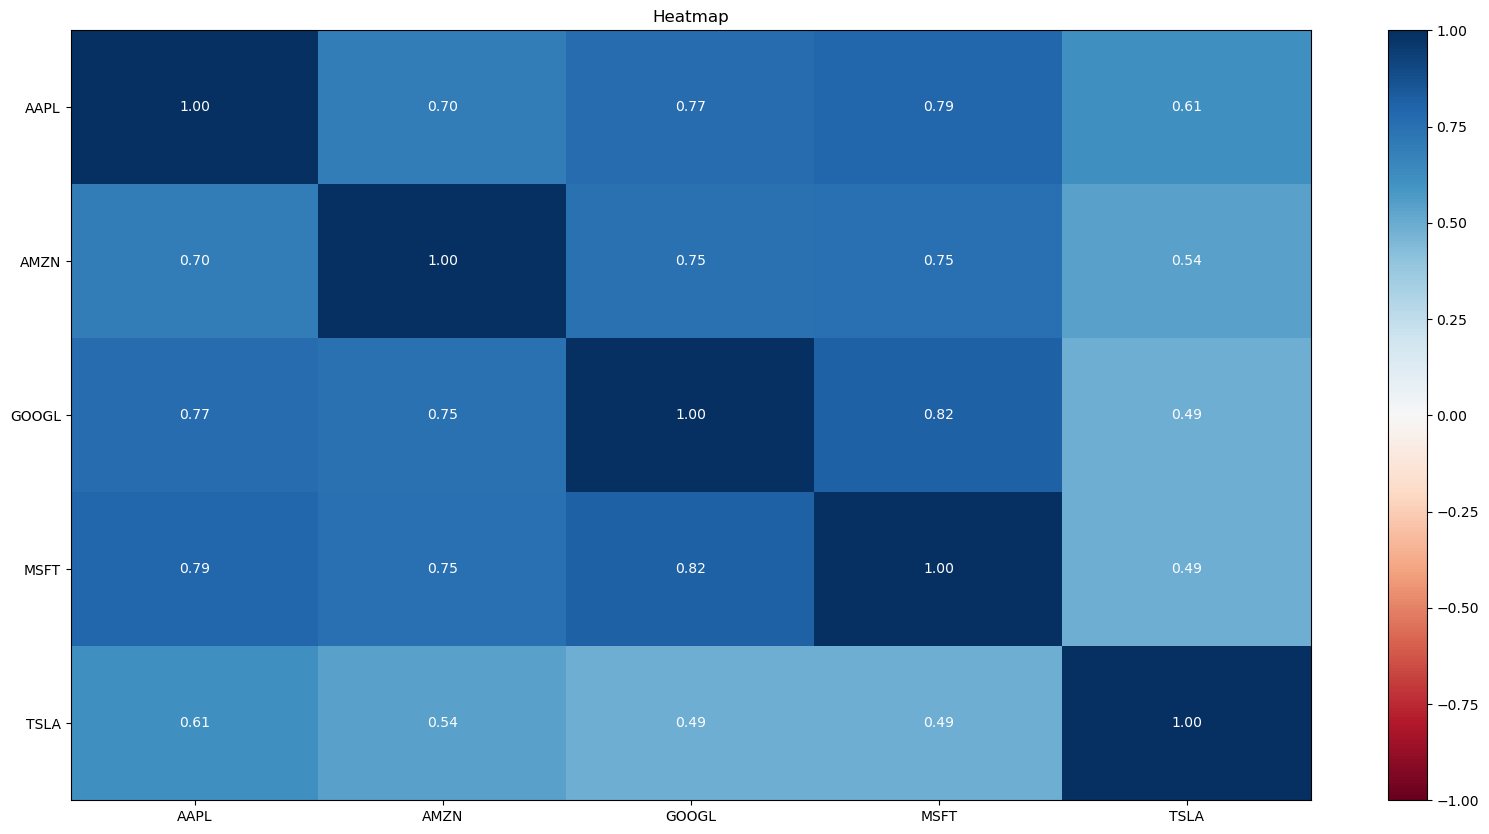

In [19]:
log_returns.plot_corr_heatmap()

# [<font color="red">配對交易](https://rich01.com/what-is-pairs-trading-0/)

# 績效評估

In [20]:
perf = prices.calc_stats()

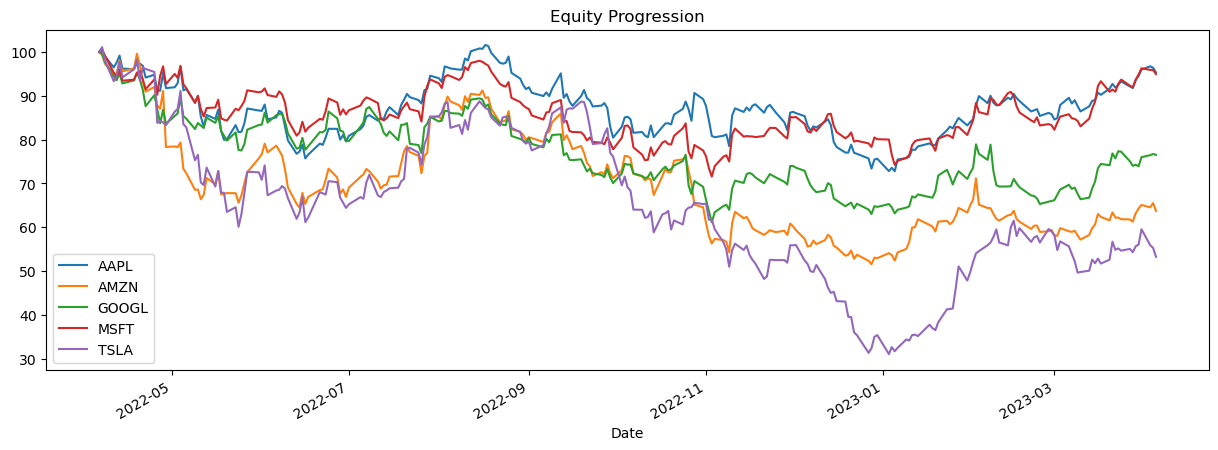

In [21]:
perf.plot()

In [22]:
perf.display()

Stat                 AAPL        AMZN        GOOGL       MSFT        TSLA
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2022-04-06  2022-04-06  2022-04-06  2022-04-06  2022-04-06
End                  2023-04-05  2023-04-05  2023-04-05  2023-04-05  2023-04-05
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -4.70%      -36.32%     -23.49%     -5.06%      -46.78%
Daily Sharpe         0.03        -0.71       -0.49       0.02        -0.62
Daily Sortino        0.05        -1.15       -0.82       0.04        -0.98
CAGR                 -4.71%      -36.42%     -23.56%     -5.08%      -46.89%
Max Drawdown         -28.38%     -48.46%     -38.90%     -28.91%     -69.33%
Calmar Ratio         -0.17       -0.75       -0.61       -0.18       -0.68

MTD                  -0.69%      -2.12%      0.71%       -1.37%      -10.58%
3m                   30.99%      21.63%      21.19%      27.90%      68.13%


### <span style="color:red ">名詞解釋
1. Daily Sharpe [夏普率](https://rich01.com/what-sharpe-ratio/)==>數值越高越好
2. Daily Sortino [索丁諾比率](https://rich01.com/what-is-sortino-ratio/)==>Sortino Ratio數值越高越好
3. CAGR [複合年均增長率](https://blog.xuite.net/luiyeetung/hkblog/165068351)
4. Max Drawdown [最大交易回落](https://tradesoeasy.pixnet.net/blog/post/343033550-maxdrawdown)
5. Calmar比率（Calmar Ratio）描述的是收益和最大回落之間的關係。計算方式為複合年均增長率與最大交易回落之間的比率。
   Calmar比率數值越大，績效表現越好。反之 ，績效表現越差
6. MTD ( Month To Date )，為計算日與上月底相比的變動率。
   例如1月底的淨值為12，而2月17日的淨值為12.9，那麼2/17當日的淨值MTD為 (12.9- 12)/12=7.5%。